In [1]:
## importing necessary Libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 
from sklearn.feature_selection import mutual_info_regression 
from sklearn.decomposition import PCA


In [2]:
!pip install arrange 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for arrange: filename=arrange-0.1.0-py3-none-any.whl size=1144 sha256=6f08b5ec9a7b18177bf4e4cdd9ea3808689cbe6756858f77898e2b0d1bc01c5f
  Stored in directory: /root/.cache/pip/wheels/24/ce/3e/d7b553a0b10eb88098cfeae75cb9c8cf21d9eaea4aa1e49504
Successfully built arrange


**Plotting & Defining the plot_variance, explained variance, cumulative variance, set figures and mi scores!**

In [3]:
plt.style.use("seaborn-whitegrid")
plt.rc('figure' , autolayout = True)
plt.rc( "axes", labelweight = "bold",labelsize = "large", titleweight = "bold", titlesize = 10, titlepad = 8)

In [4]:
# defining the plot function 
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores



In [5]:
cleanfile = pd.read_csv('/content/CleanAutomobile.csv')

In [6]:
cleanfile.dtypes


Unnamed: 0             int64
symboling            float64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
price                  int64
city-L/100km         float64
highway-L/100km      float64
horsepower-bin        object
fuel-type-Diesel       int64
diesel                 int64
fuel-type-Gas          int64
gas                    int64
dtype: object

In [7]:
cleanfile.shape

(216, 32)

In [8]:
cleanfile.isnull().sum()

Unnamed: 0           0
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
price                0
city-L/100km         0
highway-L/100km      0
horsepower-bin       0
fuel-type-Diesel     0
diesel               0
fuel-type-Gas        0
gas                  0
dtype: int64

In [139]:
features = ["highway-L/100km", "horsepower", "peak-rpm","curb-weight"]

X = cleanfile.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0) 

print(X_scaled)

     highway-L/100km  horsepower  peak-rpm  curb-weight
0           0.351383    0.084849 -0.228912    -0.048457
1           0.351383    0.084849 -0.228912    -0.048457
2           0.537202    1.118219 -0.228912     0.485264
3          -0.131746   -0.131438  0.812718    -0.457967
4           1.449403    0.180976  0.812718     0.487204
..               ...         ...       ...          ...
211         1.731751   -0.035311 -1.895519    -0.700567
212        -0.131746    1.262411 -1.895519     0.916122
213         0.018191    0.156944 -0.645564     0.923885
214        -0.131746    0.156944  0.812718     0.923885
215         1.449403    0.156944 -0.645564    -0.700567

[216 rows x 4 columns]


In [140]:
from sklearn.decomposition import PCA
# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
print(pca)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()


PCA()


,PC1,PC2,PC3,PC4
0,0.241625,-0.153449,-0.054618,0.317026
1,0.241625,-0.153449,-0.054618,0.317026
2,1.238183,-0.009773,0.526572,0.128107
3,-0.477407,0.818721,-0.063547,0.051163
4,1.174510,0.865899,-0.876208,0.366613


In [141]:
loadings = pd.DataFrame(pca.components_.T,  columns=component_names, index=X.columns)  # so the columns are the principal components  # transpose the matrix of loadings # and the rows are the original features
loadings

,PC1,PC2,PC3,PC4
highway-L/100km,0.585674,0.102248,-0.506917,0.624153
horsepower,0.557599,0.220930,0.795467,0.086639
peak-rpm,-0.073397,0.950283,-0.186525,-0.238292
curb-weight,0.583681,-0.194157,-0.274728,-0.739016


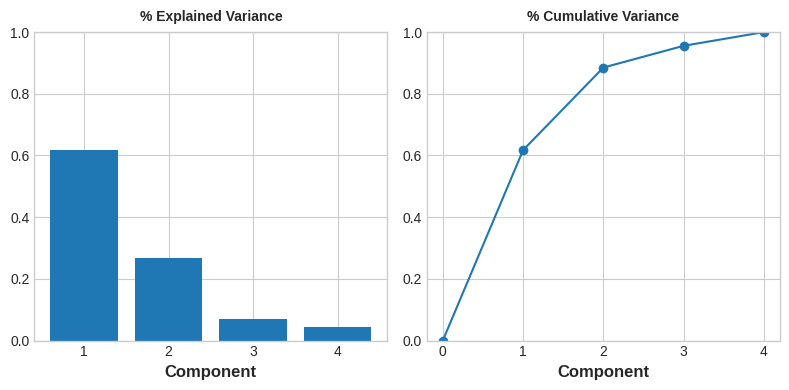

In [142]:
# Explained variance in plot 
plot_variance(pca);

In [143]:
mi_scores = make_mi_scores(X_pca, y , discrete_features = False)
mi_scores

PC1    0.996364
PC2    0.403259
PC3    0.270116
PC4    0.035797
Name: MI Scores, dtype: float64

In [144]:
# Show dataframe sorted by PC3
idx = X_pca["PC1"].sort_values(ascending=False).index
cols = [ "make","horsepower","highway-L/100km", "peak-rpm", "curb-weight"]
cleanfile.loc[idx, cols]

,make,horsepower,highway-L/100km,peak-rpm,curb-weight
46,jaguar,262.0,13.836176,0.757576,3950
70,mercedes-benz,184.0,14.700938,0.681818,3900
71,mercedes-benz,184.0,14.700938,0.681818,3715
45,jaguar,176.0,12.379737,0.719697,4066
44,jaguar,176.0,12.379737,0.719697,4066
...,...,...,...,...,...
18,chevrolet,70.0,5.470116,0.818182,1874
31,honda,60.0,5.600357,0.833333,1837
87,nissan,55.0,4.704300,0.727273,2017
29,honda,58.0,4.355833,0.727273,1713


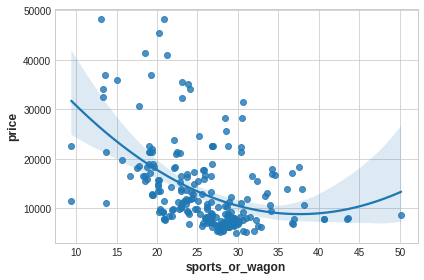

In [150]:
cleanfile["sports_or_wagon"] = cleanfile["curb-weight"] / X.horsepower
sns.regplot(x="sports_or_wagon", y='price', data=cleanfile, order=2);

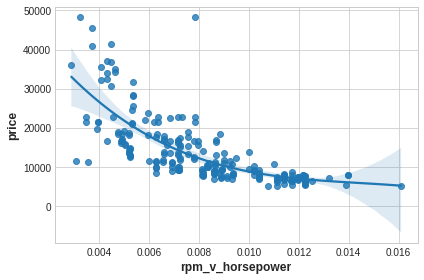

In [147]:
cleanfile["rpm_v_horsepower"] = cleanfile['peak-rpm'] / X.horsepower
sns.regplot(x="rpm_v_horsepower", y='price', data=cleanfile, order=3);